In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,48.583351,1132.989990
2010-01-05,48.599249,1136.520020
2010-01-06,48.368732,1137.140015
2010-01-07,48.106421,1141.689941
2010-01-08,48.042829,1144.979980


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2017-03-20,91.220001,2373.469971
2017-03-21,91.190002,2344.020020
2017-03-22,90.989998,2348.449951
2017-03-23,90.769997,2345.959961
2017-03-24,90.570000,2343.979980


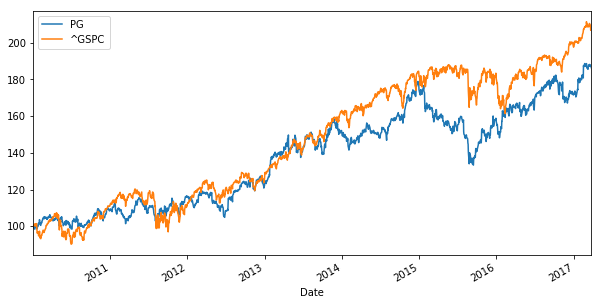

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.085649
^GSPC    0.099971
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.020157,0.012501
^GSPC,0.012501,0.023402


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.00000,0.57556
^GSPC,0.57556,1.00000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([ 0.06862404,  0.88075139])

In [13]:
arr[0] + arr[1]

0.94937543198839347

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.00467335,  0.99532665])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.09990421667805888

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.023300105534860904

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.15264372091527678

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.09290697478479785,
  0.09148668996659291,
  0.097623336158928,
  0.09307675417586932,
  0.09509491357366429,
  0.09379769911474364,
  0.0987807561009095,
  0.0889230826470715,
  0.09462675507430936,
  0.09177863998902404,
  0.09225578368018397,
  0.09776754234510106,
  0.09119599033387425,
  0.09540214702094443,
  0.0909508853512568,
  0.09057544412002216,
  0.09725984556693379,
  0.0904917817783243,
  0.09371306693948807,
  0.08955187205213999,
  0.09165558628089644,
  0.09224008937431934,
  0.09167267129461215,
  0.09263953536627051,
  0.09113428966685695,
  0.09263681461560674,
  0.09357314853759044,
  0.09503868145364903,
  0.09263593533924587,
  0.0962424993709994,
  0.09667733351293949,
  0.08722133425064796,
  0.09451424421862809,
  0.09507928030844988,
  0.09539299460130199,
  0.09196433191860649,
  0.09502780894881475,
  0.08978823939497865,
  0.09500214054046335,
  0.09382614055960099,
  0.09265053204665956,
  0.08923696608531631,
  0.09317836716362313,
  0.09571439264148

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.09337103,  0.09116675,  0.09435063,  0.08846713,  0.08903277,
         0.0874294 ,  0.09642485,  0.0977061 ,  0.09818397,  0.08765189,
         0.0951846 ,  0.09175593,  0.09329771,  0.090505  ,  0.09286237,
         0.09789139,  0.09435233,  0.09654569,  0.08943892,  0.09375285,
         0.09630699,  0.09229371,  0.0890396 ,  0.09091206,  0.09089589,
         0.09288211,  0.09017507,  0.098413  ,  0.08997802,  0.09076285,
         0.08715298,  0.09281842,  0.09341713,  0.09972964,  0.08985087,
         0.09038559,  0.09810567,  0.08996333,  0.09664687,  0.08760134,
         0.08868155,  0.09401009,  0.09346738,  0.0970144 ,  0.0975504 ,
         0.09724896,  0.09242345,  0.09745906,  0.09287216,  0.0916328 ,
         0.09336271,  0.09612295,  0.09748786,  0.09149214,  0.09015442,
         0.08967729,  0.08719694,  0.09919309,  0.09337866,  0.08895592,
         0.09367895,  0.0930271 ,  0.09495988,  0.0923468 ,  0.09184948,
         0.08762321,  0.09395199,  0.09950771,  0.0

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.093371,0.131512
1,0.091167,0.130430
2,0.094351,0.133055
3,0.088467,0.133651
4,0.089033,0.132572


In [23]:
portfolios.tail()

,Return,Volatility
995,0.096037,0.137160
996,0.090742,0.130608
997,0.097744,0.143039
998,0.093472,0.131641
999,0.090272,0.130950


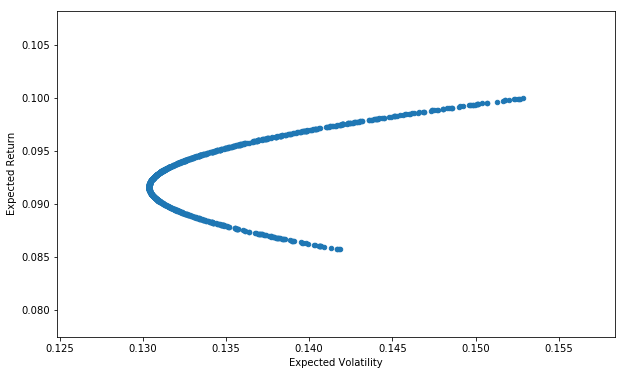

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')